First we import the necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk

Now we try some random things

In [5]:
# a=np.array([1,2,3])
# print(a.dtype)
# a= [1,2,3]
# b=np.transpose(a)
# b=np.array([[4,5,6],[7,8,9],[12,13,14]])
# print(np.diag(a))
# a,b=1e-1000,7
# print(np.dot(a,b))

Importing data fom the toy datasets

In [6]:
da= sk.load_breast_cancer()
x,y= da.data,da.target
x=np.c_[[1]*569,x]
# x_test,y_test=x[469:],y[469:]
# x,y=x[:469],y[:469]
x_test,y_test= x[:30],y[:30]

# Then we initialise some variables to use
n= len(y)    # The number of training examples
f=len(x[0])  # The number of features used in x including the pseudo feature(1)
n_= len(x_test)  # The number of testing examples

we define the hypothesis function

In [7]:
def h(x,theta):    # it takes theta as a column veftor of length 'f' and x as a row vector of length 'f'
    return 1/(1+np.exp(-np.dot(x,theta)))     # and it returns a scalar in numpy float format and not as an array so it does not have a shape

Defining the function to apply the Newton raphson algorithm for cost function minimisation on a given point

In [10]:
def find(var):
    tau=0.001
    lamda=0.0001
    theta=np.array([[1.]]*f)    # initialising the value of theta at 1

    # Here we predefine some variables for usage in the newton raphson formula given in problemset 1 of the cs229 course
    I= np.identity(f)    #identity matrix
    w= ((var-x)**2)    # diagonal matrix for representing weights
    w= np.array([sum(i) for i in w])
    w= np.exp((w)/2*tau**2)
    Z= []  # I don't understand what these both actually are but they were given in the formula expression(actually they are some--  
    D= []  # --variable that came during applying the newton algorithm over matrices)
    for ind,i in enumerate(x):
        variable1= np.dot(h(i,theta),(1-h(i,theta)))
        D.append(-variable1*(w[ind]))
        variable2=y[ind]-h(i,theta)
        Z.append(variable2*w[ind])
    
    
    Z=np.array(Z)
    w= np.diag(w)
    D= np.diag(D)
    counter=0
    # print(Z)

    while counter<13:
        hess= np.dot(x.T,D)
        hess= np.dot(hess,x)
        hess= hess-(lamda*I)
        hess= np.linalg.inv(hess)
        grad= np.dot(x.T,Z)-(lamda*theta)
        theta-= np.dot(hess,grad)
        counter+=1

    return h(var,theta)

Using the function to use on test cases and plot

*


C:\Users\nitu2\AppData\Local\Temp\ipykernel_8884\2517996326.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-np.dot(x,theta)))     # and it returns a scalar in numpy float format and not as an array so it does not have a shape


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[0.] ***
[0.] ***
[0.] ***
3


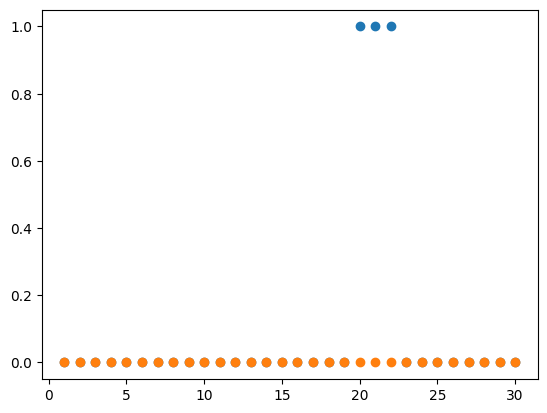

In [11]:
print("*")
x_plot= np.array([i for i in range(1,n_+1)])
predicted=[]
for i,j in enumerate(x_test):
    predicted.append(find(j))
    print(i)

predicted= np.array(predicted)
plt.scatter(x_plot,y_test)
plt.scatter(x_plot,predicted)
counter=0
for i in range(n_):
    if predicted[i]-y_test[i]!=0:
        counter+=1
        print(predicted[i],"***")
print(counter)
plt.show()